In [3]:
print("This is Rock Paper Scisor model")

This is Rock Paper Scisor model


# Importing Libraries and extract the zip file

In [7]:
import os
import zipfile
import re
""
local_zip = r"C:\Users\Sunshine\Downloads\Compressed\rock-paper-sci dataset\rps.zip"
zip_ref = zipfile.ZipFile(local_zip)
zip_ref.extractall(r"C:\Users\Sunshine\Downloads\Compressed\rock-paper-sci dataset")
zip_ref.close()

local_zip = r"C:\Users\Sunshine\Downloads\Compressed\rock-paper-sci dataset\rps-test-set.zip"
zip_ref = zipfile.ZipFile(local_zip)
zip_ref.extractall(r"C:\Users\Sunshine\Downloads\Compressed\rock-paper-sci dataset")
zip_ref.close()

In [2]:
import os
rock_dir = os.path.join(r"C:\Users\asus\doc github\handtracking\rps\train\rock")
paper_dir = os.path.join(r"C:\Users\asus\doc github\handtracking\rps\train\paper")
sci_dir = os.path.join(r"C:\Users\asus\doc github\handtracking\rps\train\scissors")

# Total Images of rock paper and scissors

In [3]:
print("Paper images", len(os.listdir(paper_dir)))
print("Rock images", len(os.listdir(rock_dir)))
print("Scissors images", len(os.listdir(sci_dir)))

Paper images 840
Rock images 840
Scissors images 840


In [4]:
import keras

In [5]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [6]:
training_dir = r"C:\Users\asus\doc github\handtracking\rps\train"

In [7]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [8]:
validation_dir = r"C:\Users\asus\doc github\handtracking\rps\valid"

In [9]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
train_generator = training_datagen.flow_from_directory(
                     training_dir, 
                    target_size = (150, 150),
                    class_mode = "categorical",
                    batch_size = 126)

Found 2520 images belonging to 3 classes.


In [11]:
validation_generator = validation_datagen.flow_from_directory(
                        validation_dir,
                        target_size = (150, 150),
                        class_mode = "categorical",
                        batch_size = 126)

Found 372 images belonging to 3 classes.


# Making model

In [12]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation = "relu", input_shape = (150, 150, 3)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64, (3,3), activation = "relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128, (3,3), activation = "relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128, (3,3), activation = "relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.Dense(3, activation = "softmax")
    
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [14]:
model.compile(optimizer = "RMSprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [15]:
history = model.fit_generator(train_generator, 
                             epochs = 25,
                              steps_per_epoch=20,
                             validation_data = validation_generator,
                              verbose = 1, 
                              validation_steps=3)

model.save("rps.h5")

C:\Users\asus\AppData\Local\Temp\ipykernel_36764\2778396403.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/25
20/20 [==============================] - 73s 4s/step - loss: 1.2319 - accuracy: 0.3468 - val_loss: 1.0905 - val_accuracy: 0.4946
Epoch 2/25
20/20 [==============================] - 70s 3s/step - loss: 1.1045 - accuracy: 0.3734 - val_loss: 1.0855 - val_accuracy: 0.4489
Epoch 3/25
20/20 [==============================] - 69s 3s/step - loss: 1.2015 - accuracy: 0.4274 - val_loss: 1.0536 - val_accuracy: 0.5968
Epoch 4/25
20/20 [==============================] - 70s 3s/step - loss: 1.0362 - accuracy: 0.4770 - val_loss: 0.9285 - val_accuracy: 0.3683
Epoch 5/25
20/20 [==============================] - 68s 3s/step - loss: 0.9770 - accuracy: 0.5206 - val_loss: 0.6229 - val_accuracy: 0.8629
Epoch 6/25
20/20 [==============================] - 68s 3s/step - loss: 0.8615 - accuracy: 0.6044 - val_loss: 0.4438 - val_accuracy: 0.8522
Epoch 7/25
20/20 [==============================] - 72s 4s/step - loss: 0.7727 - accuracy: 0.6437 - val_loss: 0.3601 - val_accuracy: 0.8387
Epoch 8/25
20/20 [==

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


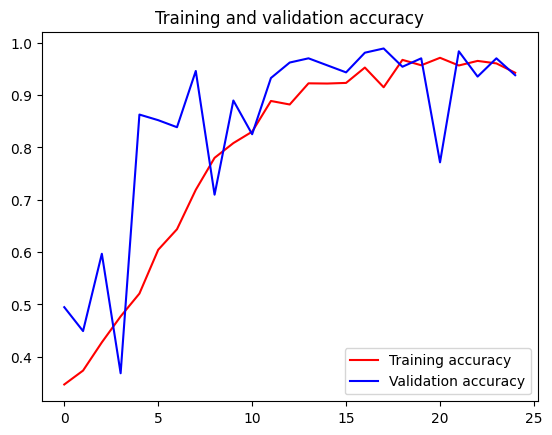

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# Testing on new image [[ rock, paper, scissors]]

In [33]:
import numpy as np
from keras.preprocessing import image
path = r"C:\Users\Sunshine\Downloads\Compressed\rock-paper-sci dataset\rps-test-set\scissors\testscissors01-02.png"
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes)

[[0. 0. 1.]]


In [ ]:
#models=YOLO("100.pt")
import numpy as np
import cv2

import numpy as np

import time
import pyautogui
cap = cv2.VideoCapture(1)

cooldown_seconds = 5
last_slide_change_time = 0

while True:
    ret, frame = cap.read()
    target_size = (150, 150)
    if not ret:
        break

    try:
        img = frame.resize(target_size)
        #img = image.load_img(path, target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])
        predictions = model.predict(images, batch_size=10)
        for pred in predictions:
            x = int(pred['x'] - pred['width'] / 2)
            y = int(pred['y'] - pred['height'] / 2)
            w = int(pred['width'])
            h = int(pred['height'])
            label = pred['class']

            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            current_time = time.time()

            if current_time - last_slide_change_time > cooldown_seconds:
                if label == "Rock":
                    pyautogui.press('right')
                    last_slide_change_time = current_time
                elif label == "Paper":
                    pyautogui.press('left')
                    last_slide_change_time = current_time
                elif label == "Scissors":
                    pyautogui.press('d')
                    last_slide_change_time = current_time
            
            # print(current_slide_idx)

            # cv2.imshow('Presentation', slides[current_slide_idx])

    except Exception as e:
        print("Error processing the frame:", e)

    cv2.imshow('Slide Controller', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Error processing the frame: 'target_size' is an invalid keyword argument for this function
Error processing the frame: 'target_size' is an invalid keyword argument for this function
Error processing the frame: 'target_size' is an invalid keyword argument for this function
Error processing the frame: 'target_size' is an invalid keyword argument for this function
Error processing the frame: 'target_size' is an invalid keyword argument for this function
Error processing the frame: 'target_size' is an invalid keyword argument for this function
Error processing the frame: 'target_size' is an invalid keyword argument for this function
Error processing the frame: 'target_size' is an invalid keyword argument for this function
Error processing the frame: 'target_size' is an invalid keyword argument for this function
Error processing the frame: 'target_size' is an invalid keyword argument for this function
Error processing the frame: 'target_size' is an invalid keyword argument for this function

: 

: 